In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 컬럼 정보

57920개의 데이터

- ID : 샘플 별 고유 id
- 생산년도 : 차량이 생산된 연도
- 모델출시년도 : 차량의 모델이 처음으로 출시된 연도
- 브랜드
- 차량모델명
- 판매도시 : 3글자로 인코딩된 도시 이름
- 판매구역 : 3글자로 인코딩된 구역 이름
- 주행거리 : 총 주행 거리(km)
- 배기량 : 내연기관에서 피스톤이 최대로 밀어내거나 빨아들이는 부피 (cc)
- 압축천연가스(CNG) : 압축천연가스(CNG) 자동차 여부
- 경유 : 경유 자동차 여부
- 가솔린 : 가솔린 자동차 여부
- 하이브리드 : 하이브리드 자동차 여부
- 액화석유가스(LPG) : 액화석유가스(LPG) 자동차 여부
- 가격 : 자동차 가격(백만원)

In [63]:
df = pd.read_csv('../csv/train.csv')
pd.set_option('display.float_format', '{:.2f}'.format)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB


In [64]:
numeric_cols = df.select_dtypes(include='number')
numeric_cols.describe()

,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
count,57920.00,57920.00,57920.00,57920.00,57920.00,57920.00,57920.00,57920.00,57920.00,57920.00
mean,2011.36,2008.03,167869.09,1788.16,0.00,0.43,0.52,0.01,0.05,52.21
std,5.17,5.09,83191.20,545.41,0.02,0.49,0.50,0.10,0.21,35.40
min,1978.00,1983.00,1.00,875.00,0.00,0.00,0.00,0.00,0.00,1.17
25%,2008.00,2004.00,111434.50,1461.00,0.00,0.00,0.00,0.00,0.00,24.57
50%,2011.00,2008.00,171000.00,1753.00,0.00,0.00,1.00,0.00,0.00,42.25
75%,2016.00,2012.00,220000.00,1995.00,0.00,1.00,1.00,0.00,0.00,73.97
max,2022.00,2021.00,2500000.00,6300.00,1.00,1.00,1.00,1.00,1.00,156.00


## 숫자형  데이터 분석

In [112]:
# 함수 정의
# 히스토그램 차트
def hist(category):
    plt.hist(df[category])
    plt.xlabel(category)
    plt.ylabel('빈도')
    plt.title(f'{category} 분포')
    plt.show()
    
# 박스플롯 차트
def box(category):
    sns.boxplot(data=df[category])
    # 그래프 설정
    plt.xlabel(category)
    plt.title(f'{category} 범위에 대한 분포')
    plt.show()
    
# 차트 한글폰트
plt.rc('font', family='Malgun Gothic')

# hist subplot
def make_subplot_layout(df,col_num=4) :
    k = len(df.columns)
    row_num = math.ceil(k/col_num)
    plt.figure(figsize=(col_num*4,row_num*3))
    for i in range(k) : 
        plt.subplot(row_num,col_num,i+1)
        plt.hist(df.iloc[:,i])
        plt.title(df.columns[i])
    plt.tight_layout()
    plt.show()

def barplot(category, xsize=10, ysize=10):
    category_counts = df[category].value_counts()
    # 개수 기준으로 정렬
    sorted_data = category_counts.sort_values(ascending=False)
    plt.figure(figsize=(xsize,ysize))
    sns.barplot(y=sorted_data.index, x=sorted_data.values)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.show()

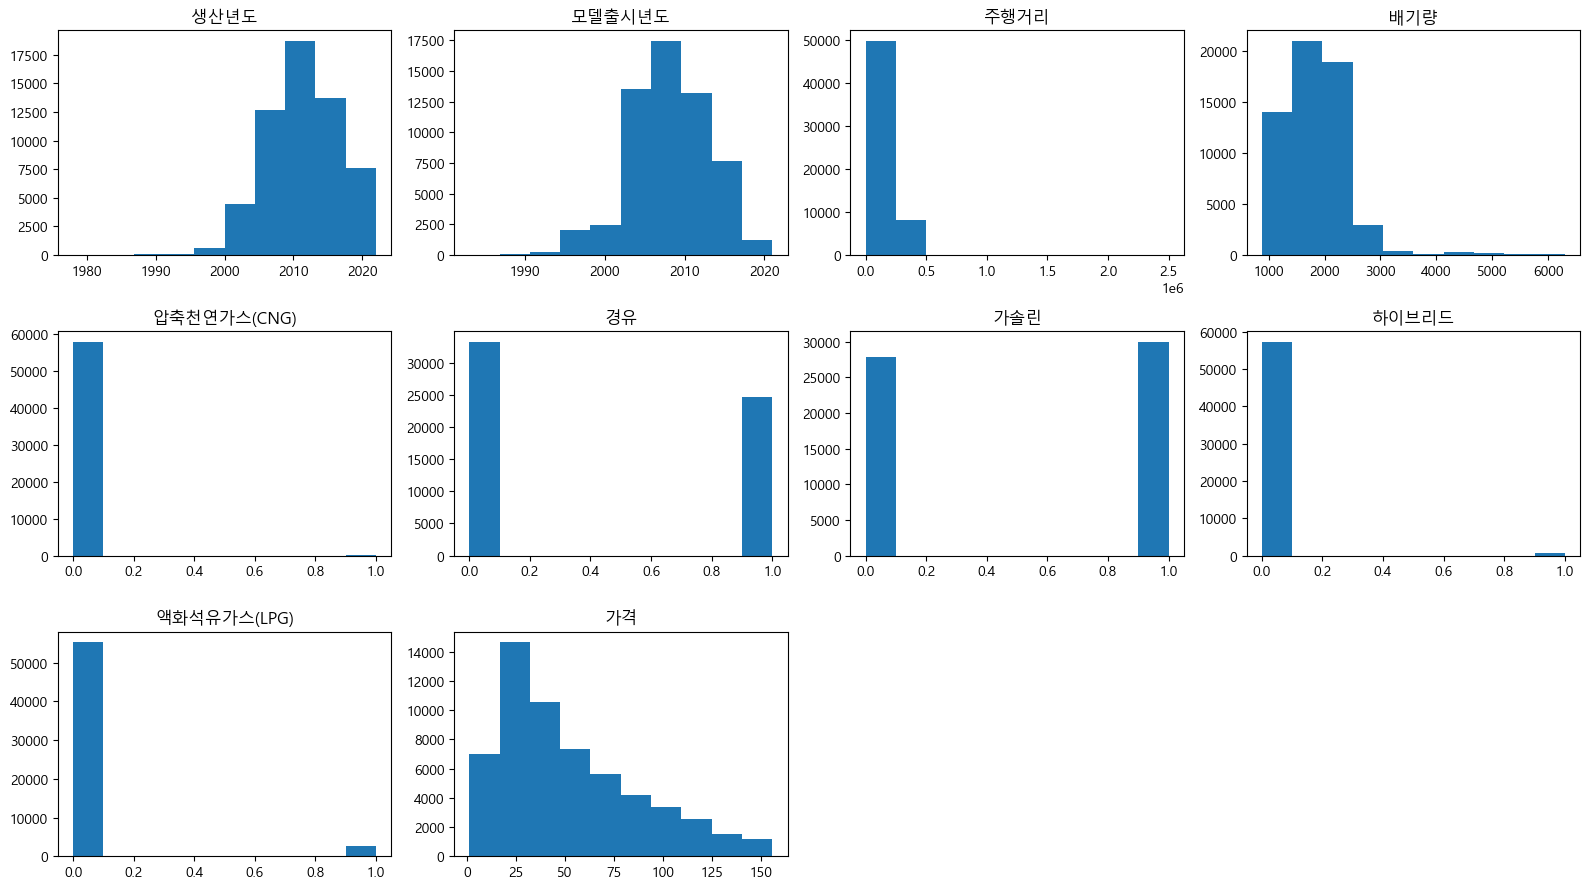

In [66]:
make_subplot_layout(numeric_cols)

생산년도와 모델출시년도의 차이는 의미 없어 보임

### 주행거리 이상치 제거

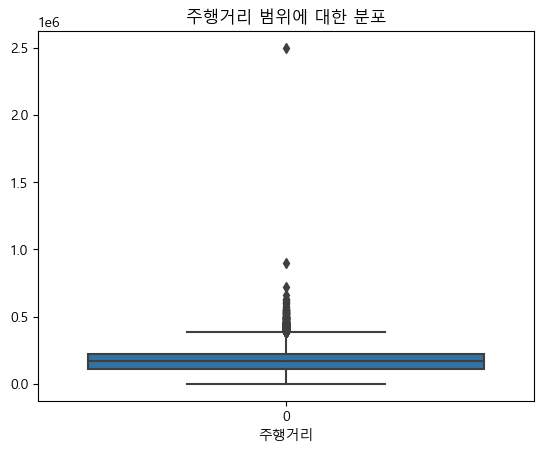

In [67]:
box('주행거리')

In [68]:
sorted_data = df.sort_values(by='주행거리', ascending=False)
sorted_data.head(10)

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
40808,TRAIN_40808,2014,2014,ford,mondeo,POZ,LUB,2500000,1999,0,0,0,1,0,30.94
57668,TRAIN_57668,2017,2014,mercedes-benz,vito,PIL,WIE,900000,2143,0,1,0,0,0,87.94
21390,TRAIN_21390,2007,2006,mercedes-benz,gl-klasa,KAR,LUU,720000,2987,0,1,0,0,0,55.90
27691,TRAIN_27691,2013,2006,mercedes-benz,sprinter,ILA,WAR,657130,2143,0,1,0,0,0,49.57
16290,TRAIN_16290,2008,2002,opel,vectra,PAN,SLA,631970,1910,0,1,0,0,0,15.59
34462,TRAIN_34462,2015,2003,mercedes-benz,vito,ZSR,LUB,631000,2143,0,1,0,0,0,64.87
55266,TRAIN_55266,2008,2007,volkswagen,tiguan,KAL,WIE,620000,1968,0,1,0,0,0,36.40
57217,TRAIN_57217,2008,2002,mercedes-benz,e-klasa,PAW,SWI,617000,2148,0,1,0,0,0,37.05
26507,TRAIN_26507,2011,2008,skoda,superb,WAR,MAZ,611500,1984,0,0,1,0,0,33.80
5812,TRAIN_05812,2010,2001,renault,trafic,SOS,SLA,602112,1998,0,0,1,0,0,29.77


In [69]:
# 주행거리가 2500000인 것은 이상치라고 판단하여 제거함
df = df[df['주행거리'] != df['주행거리'].max()]

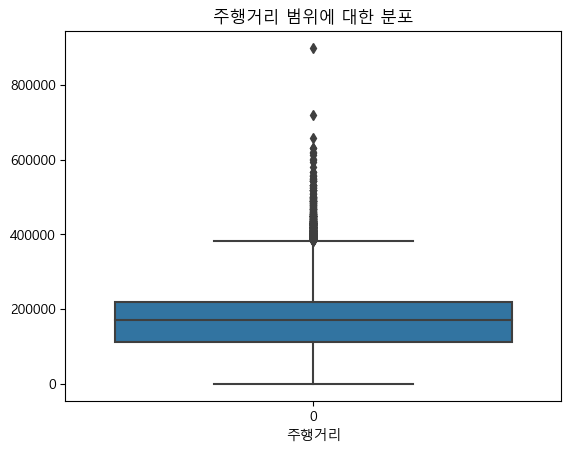

In [70]:
box('주행거리')

## 범주형 데이터 분석

In [71]:
df.head(10)

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55
5,TRAIN_00005,2001,1995,audi,a4,KAT,SLA,340000,1984,0,0,0,0,1,7.80
6,TRAIN_00006,2021,2019,renault,clio,RAD,MAZ,10,999,0,0,0,0,1,99.45
7,TRAIN_00007,2005,2005,volkswagen,passat,ELB,WAR,217850,1595,0,0,1,0,0,20.80
8,TRAIN_00008,2018,2014,skoda,fabia,OPO,OPO,98514,1000,0,0,1,0,0,62.27
9,TRAIN_00009,2011,2006,citroen,c4-picasso,LUB,LUB,201000,1560,0,1,0,0,0,28.47


In [75]:
df['브랜드'].unique()

array(['skoda', 'toyota', 'mercedes-benz', 'nissan', 'fiat', 'audi',
       'renault', 'volkswagen', 'citroen', 'bmw', 'opel', 'ford', 'mazda',
       'honda', 'kia', 'seat', 'volvo', 'peugeot', 'hyundai',
       'mitsubishi'], dtype=object)

In [82]:
df['브랜드'].value_counts()

opel             6651
ford             5818
volkswagen       5693
audi             5597
bmw              5262
renault          3853
toyota           3259
skoda            3130
mercedes-benz    2899
nissan           2129
kia              2034
hyundai          1855
seat             1628
mazda            1572
honda            1545
volvo            1352
fiat             1164
citroen          1129
peugeot           793
mitsubishi        556
Name: 브랜드, dtype: int64

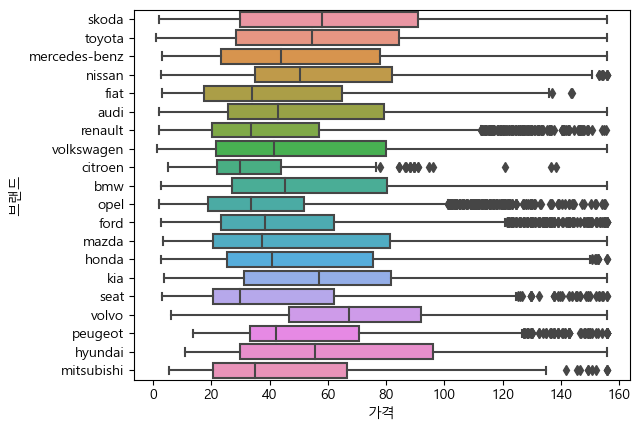

In [88]:
sns.boxplot(x='가격', y='브랜드', data=df)
plt.show()

브랜드 별로 저가모델과 고가모델의 차이가 있는 것으로 추정

In [91]:
df['차량모델명'].unique()

array(['fabia', 'auris', 'clk-klasa', 'x-trail', 'bravo', 'a4', 'clio',
       'passat', 'c4-picasso', 'seria-5', 'zafira', 'galaxy', '6', 'jazz',
       'qashqai', 'corsa', 'polo', 'ceed', '3', 'x5', 'astra', 'yaris',
       'leon', 'panda', 'c-max', 'c5', 'kuga', 'picanto', 'insignia',
       'focus', 'cr-v', 'superb', 'grand-scenic', 'rav4', 'seria-1', 'a6',
       'punto', 'tipo', 'alhambra', 'x1', 'x3', 'mondeo', 'micra',
       'seria-3', 'a3', 'golf', 'vito', 'laguna', 'cls-klasa', 's-klasa',
       'xc-60', 'sportage', 'meriva', 's80', 'e-klasa', 'm-klasa',
       'octavia', 'civic', 'juke', 'accord', 'seria-6', 'vectra', '3008',
       'megane', 'tucson', 'caddy', 'c-klasa', 'lancer', 'corolla', 'a8',
       'fiesta', 'i30', 'outlander', 'ibiza', 'v40', 'v60', 'tiguan',
       'combo', 'q5', 'avensis', 'sharan', 'a5', 'carens', 'x6',
       'touareg', '5', 'jetta', 'a-klasa', 'elantra', 'twingo', 'touran',
       's-max', 'espace', 'berlingo', 'trafic', 's60', 'scenic',
      

In [92]:
df['차량모델명'].value_counts()

astra        2537
a4           2082
seria-3      1998
golf         1910
focus        1647
             ... 
omega          17
frontera       14
s3              7
gle-klasa       2
g-klasa         1
Name: 차량모델명, Length: 143, dtype: int64

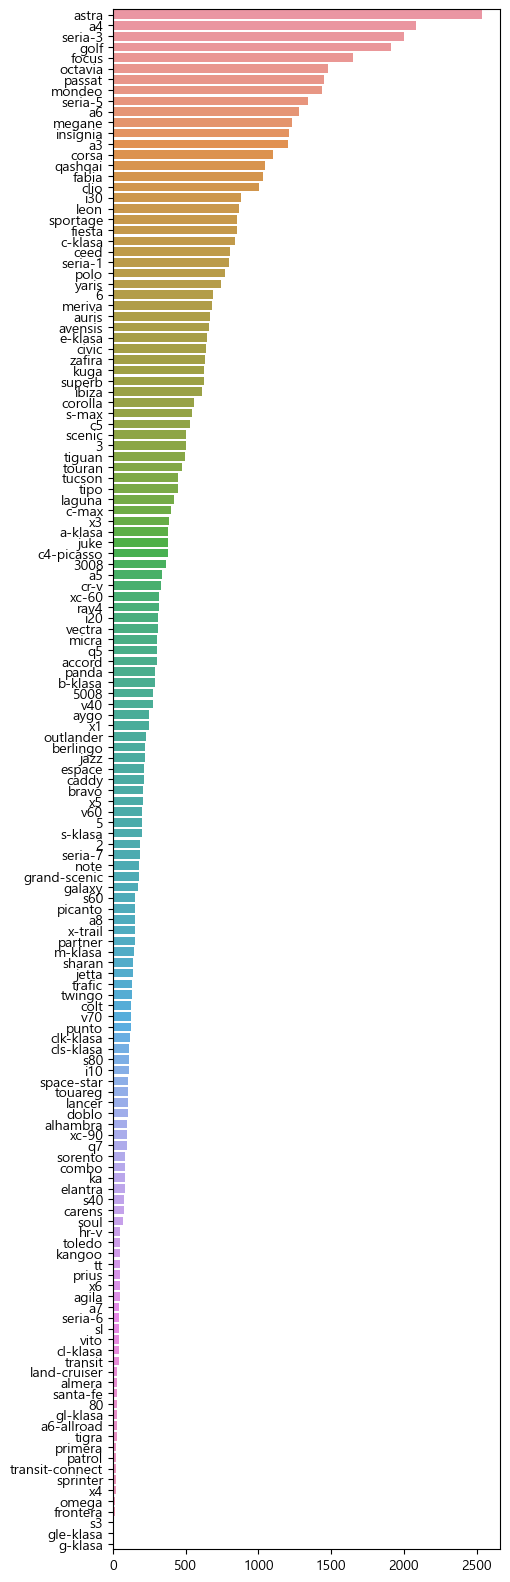

In [113]:
barplot('차량모델명', 5, 20)

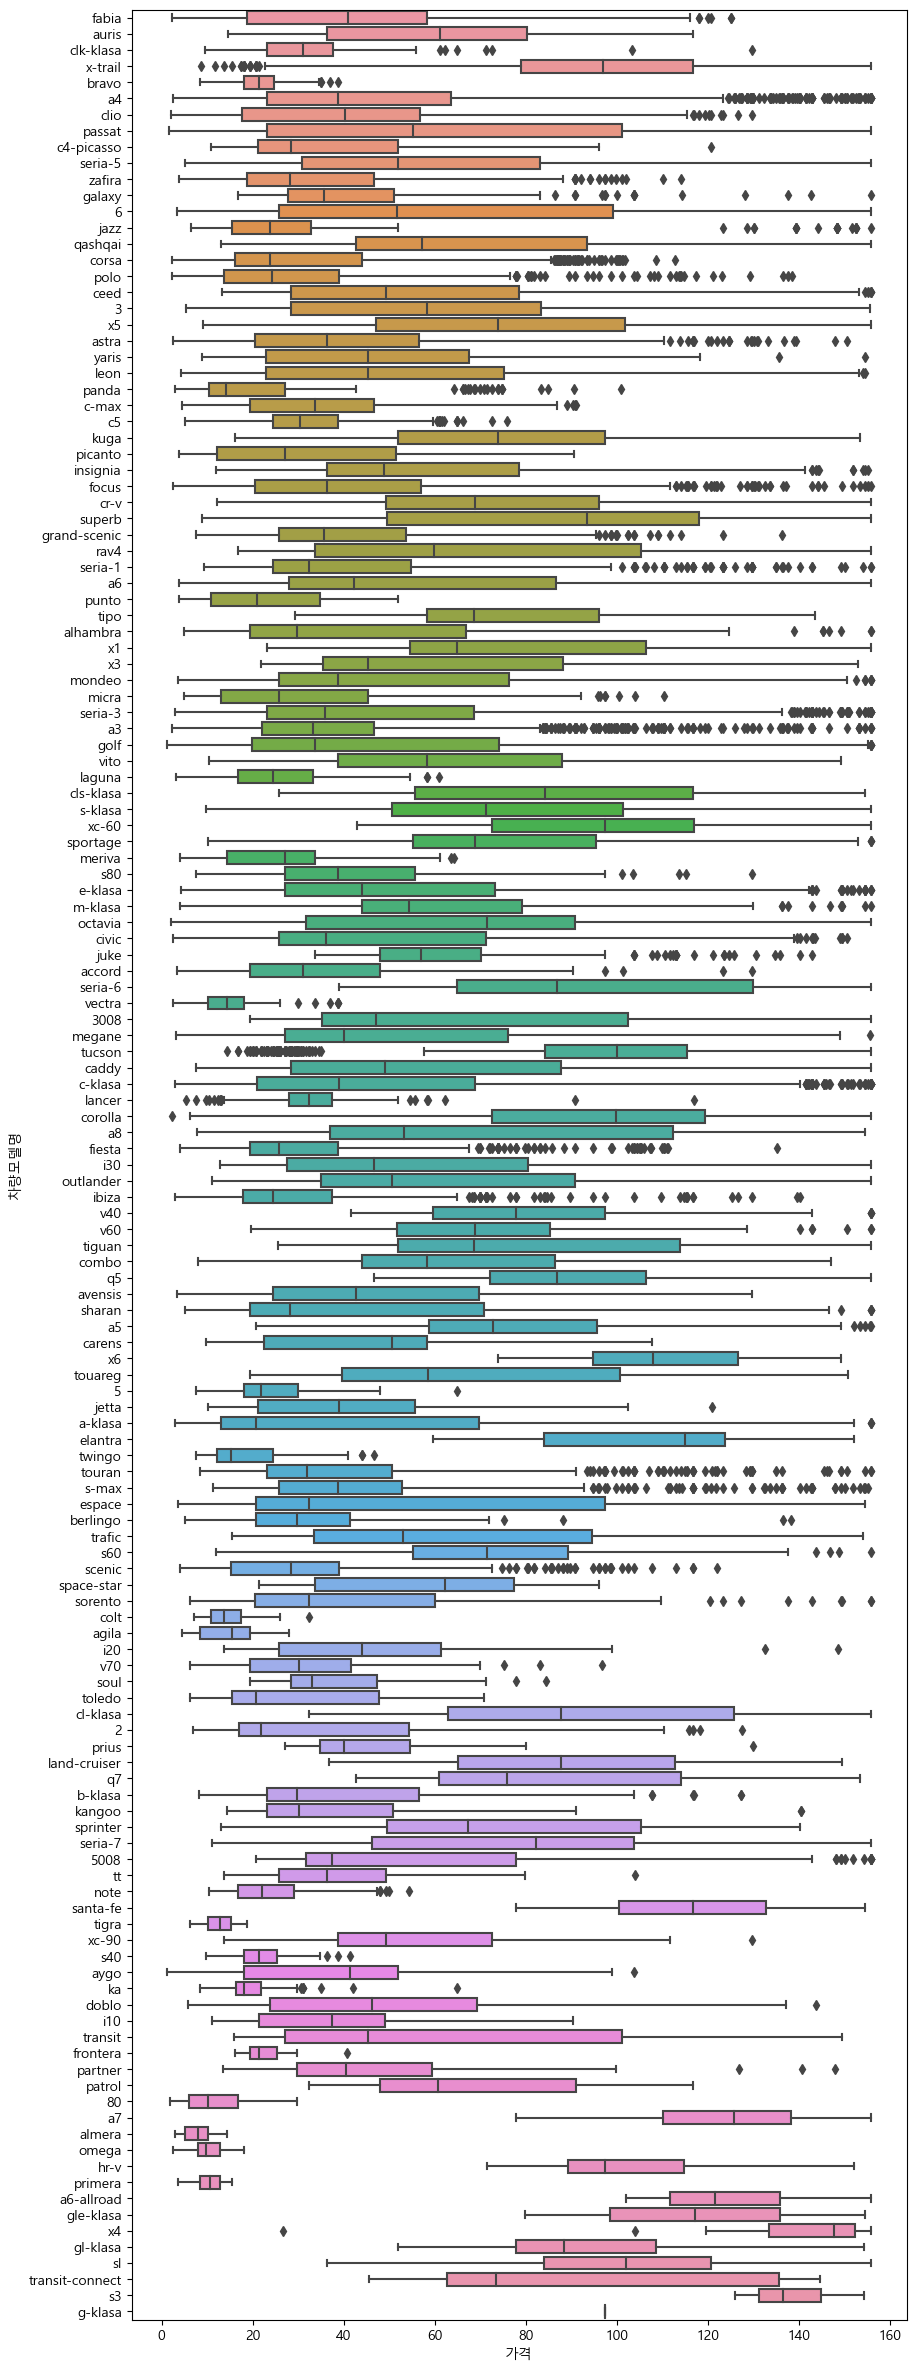

In [117]:
plt.figure(figsize=(10,30))
sns.boxplot(x='가격', y='차량모델명', data=df)
plt.show()

In [121]:
display(df[df['차량모델명']=='a4'].min(), df[df['차량모델명']=='a4'].max())

ID             TRAIN_00005
생산년도                  1995
모델출시년도                1995
브랜드                   audi
차량모델명                   a4
판매도시                   ABH
판매구역                   DOL
주행거리                     1
배기량                   1395
압축천연가스(CNG)              0
경유                       0
가솔린                      0
하이브리드                    0
액화석유가스(LPG)              0
가격                    2.47
dtype: object

ID             TRAIN_57889
생산년도                  2021
모델출시년도                2015
브랜드                   audi
차량모델명                   a4
판매도시                   ZYW
판매구역                   ZAC
주행거리                520000
배기량                   3197
압축천연가스(CNG)              0
경유                       1
가솔린                      1
하이브리드                    0
액화석유가스(LPG)              1
가격                  156.00
dtype: object